# Flight delays - Whom to blame?
## by Islam Fadly

## Preliminary Wrangling

> Dataset used: US domestic flight in 2007. Source: Harvard dataverse (https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The dataset we're going to explore here, available from Harvard dataverse (https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7), details on-time performance for around 7.5 million domestic US flights during the year 2007 and provides details on different types (and causes) of delays. 

In [2]:
df07=pd.read_csv('2007.csv')
df07.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [3]:
print('The dimensions of the dataset:',df07.shape)
print('Features of the dataset: \n',df07.columns)
df07.describe()

The dimensions of the dataset: (7453215, 29)
Features of the dataset: 
 Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.453215e+06,7.453215e+06,7.292467e+06,7.453215e+06,7.275288e+06,7.453215e+06,7.453215e+06,7.275288e+06,...,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,6.514876e+00,1.572589e+01,3.933804e+00,1.339221e+03,1.330596e+03,1.482105e+03,1.495392e+03,2.188099e+03,1.263223e+02,...,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,3.425117e+00,8.781154e+00,1.992267e+00,4.798528e+02,4.647080e+02,5.072241e+02,4.815902e+02,1.971958e+03,7.118009e+01,...,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.107000e+03,1.115000e+03,5.900000e+02,7.600000e+01,...,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.322000e+03,1.513000e+03,1.520000e+03,1.509000e+03,1.080000e+02,...,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,9.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.553000e+03,1.560000e+02,...,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.602000e+03,1.270000e+03,...,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


### Dataset structure

> The dataset lists 7,453,215 flights that that were operated in US in the year 2007. The dataset features 29 attributes for each flight.

### Main feature(s) of interest in the dataset

> The data mainly portrays time features, it contains the following attributes for each of the listed flights;
* week day, day of the month and month.
* Departure and arrival times, actual and CRS (central reservation systems)
* Flight duration.
* Flight information, such as carrier (airline), origin and destination airports, flight number and tail number (aircraft registration).
* Departure and arrival delays as well as delays due to operator(carrier), weather, NAS weather, security and aircraft related delays. 

This notebook is an effort to look deeper in flight delays, apparent patterns and airlines on-time performance. Departure and arrival delays, as well as the 5 causes for delays will be used to explore patterns and causations.

## Univariate Exploration

> Lets start by taking a look at how histograms look like for all attributes

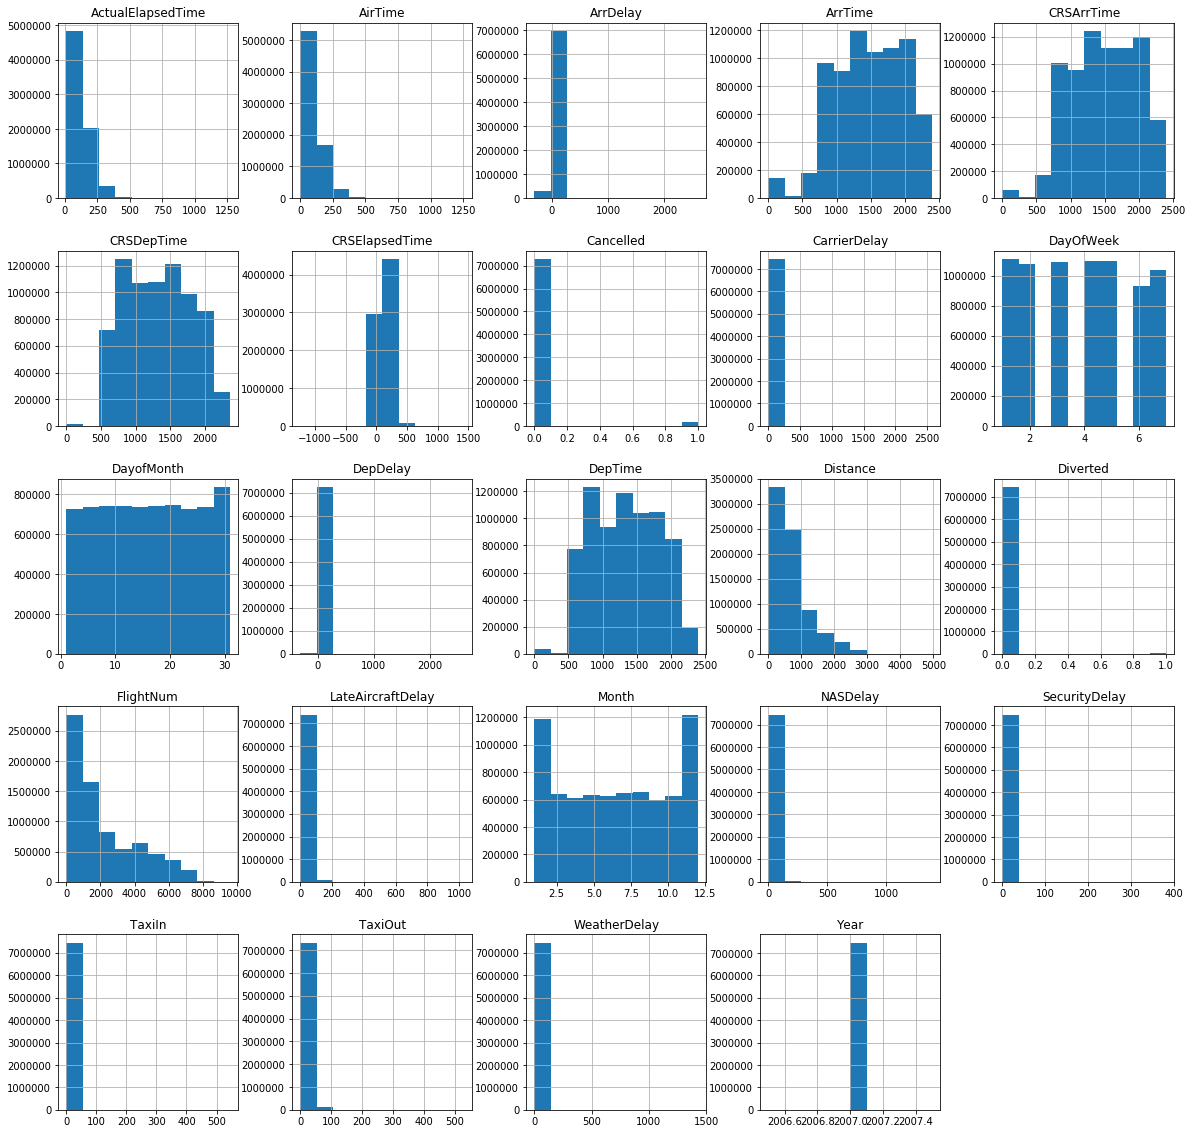

In [4]:
df07.hist(figsize=(20,20),sharey=False, sharex=False);

Observations from the above histograms:
* Short haul flight are more frequent than long haul flights.
* The number of cancelled or diverted flights seems minimal compared to the volume of flights.

In [5]:
print('List of Airlines in the dataset:\n',df07.UniqueCarrier.unique())
print('Number of Airlines in the dataset:',len(df07.UniqueCarrier.unique()))

List of Airlines in the dataset:
 ['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']
Number of Airlines in the dataset: 20


Histogram of number of flights for each of the airlines


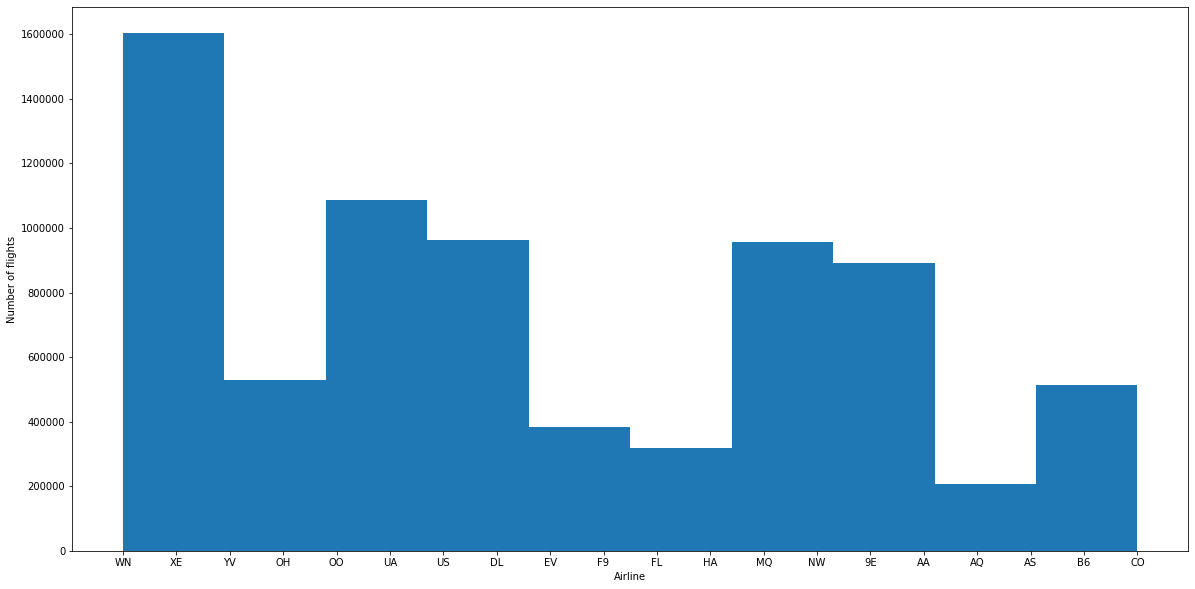

In [6]:
print('Histogram of number of flights for each of the airlines')
plt.figure(figsize=[20, 10])
plt.hist(data = df07, x = 'UniqueCarrier')#, bins = bins)
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.show()

The dataset contains 20 airlines, 304 origin airports and 310 destination airports.

In [7]:
print('Number of origin airports in the dataset:',len(df07.Origin.unique()))
print('List of origin airports in the dataset:\n',df07.Origin.unique())

Number of origin airports in the dataset: 304
List of origin airports in the dataset:
 ['SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB'
 'LIT' 'MAF' 'MCI' 'MCO' 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF'
 'PBI' 'PDX' 'PHL' 'PHX' 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF'
 'SEA' 'SJC' 'SLC' 'AEX' 'IAH' 'BFL' 'EWR' 'GSP' 'ATL' 'ORD' 'SRQ' 'CAE'
 'MSP' 'LFT' 'GRR' 'SAV' 'LRD' 'ICT' 'XNA' 'DAY' 'BPT' 'MOB' 'HPN' 'SYR'
 'CLT' 'MSN' 'BTV' 'JFK' 'BRO' 'PNS' 'CHS' 'MEM' 'GSO' 'MLU' 'ROC' 'GPT'
 'LGA' 'RIC' 'TYS' 'VPS' 'AVL' 'DFW' 'BOS' 'ABE' 'CVG' 'BTR' 'MKE' 'SHV'
 'DCA' 'COS' 'TLH' 'HSV' 'PWM' 'MGM' 'DAB' 'MDT' 'MTJ' 'MFE' 'LCH' 'LEX'
 'MIA' 'CLL' 'PSP' 'CHA' 'DSM' 'CRW' 'GRK' 'MYR' 'BGR' 'ERI' 'ASE' 'BMI'
 'CAK' 'CID' 'CLD' 'COD' 'CWA' 'DRO' 'EGE' 'EUG' 'FAT' 'FLG' 'FWA' 'GJT'
 'GRB' 'GUC' 'HDN' 'HNL' 'ILM' 'ITO' 

In [8]:
print('Number of destination airports in the dataset:',len(df07.Dest.unique()))
print('List of destination airports in the dataset:\n',df07.Dest.unique())

Number of destination airports in the dataset: 310
List of destination airports in the dataset:
 ['ONT' 'PDX' 'PHX' 'SAN' 'SEA' 'SNA' 'LAS' 'MDW' 'OAK' 'SJC' 'SMF' 'ABQ'
 'BHM' 'BWI' 'CLE' 'CMH' 'DAL' 'DTW' 'FLL' 'HOU' 'LAX' 'LIT' 'MCI' 'MCO'
 'OKC' 'OMA' 'SDF' 'SLC' 'TPA' 'TUL' 'ALB' 'AUS' 'BDL' 'BNA' 'BUF' 'IAD'
 'IND' 'ISP' 'JAX' 'MHT' 'MSY' 'PBI' 'PHL' 'PIT' 'PVD' 'RDU' 'SAT' 'STL'
 'AMA' 'ELP' 'LBB' 'MAF' 'TUS' 'HRL' 'DEN' 'GEG' 'RNO' 'JAN' 'ORF' 'RSW'
 'BOI' 'CRP' 'BUR' 'CLT' 'IAH' 'LFT' 'EWR' 'CAE' 'LCH' 'MEM' 'MGM' 'ORD'
 'CVG' 'GSO' 'LGA' 'MSN' 'CHS' 'GSP' 'SYR' 'MDT' 'PSP' 'HPN' 'MFE' 'BOS'
 'BTR' 'ICT' 'MSP' 'MOB' 'MLU' 'DAB' 'ATL' 'SHV' 'GPT' 'ROC' 'XNA' 'GRR'
 'TYS' 'VPS' 'DAY' 'LRD' 'TLH' 'SAV' 'LEX' 'BRO' 'MYR' 'DFW' 'COS' 'DSM'
 'MKE' 'RIC' 'AEX' 'CLL' 'DCA' 'SRQ' 'PWM' 'PNS' 'BTV' 'ABE' 'BFL' 'AVL'
 'GRK' 'HSV' 'CRW' 'JFK' 'CHA' 'BGR' 'MTJ' 'BPT' 'MIA' 'ERI' 'ILM' 'ASE'
 'COD' 'DRO' 'EGE' 'GJT' 'GUC' 'HDN' 'JAC' 'RAP' 'ITO' 'KOA' 'LIH' 'OGG'
 'ROA' 'HNL' 'EUG' 'FAT' 'M

Let's take a closer look at delays

In [9]:
delays=df07[['UniqueCarrier','Origin','Dest','Distance','DepDelay','ArrDelay','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','Diverted','Cancelled', 'CancellationCode']]

print('dataframe dimensions:',delays.shape)
delays.head()

dataframe dimensions: (7453215, 14)


,UniqueCarrier,Origin,Dest,Distance,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Diverted,Cancelled,CancellationCode
0,WN,SMF,ONT,389,7.0,1.0,0,0,0,0,0,0,0,NaN
1,WN,SMF,PDX,479,13.0,8.0,0,0,0,0,0,0,0,NaN
2,WN,SMF,PDX,479,36.0,34.0,3,0,0,0,31,0,0,NaN
3,WN,SMF,PDX,479,30.0,26.0,23,0,0,0,3,0,0,NaN
4,WN,SMF,PDX,479,1.0,-3.0,0,0,0,0,0,0,0,NaN


In [10]:
delays.describe()

,Distance,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Diverted,Cancelled
count,7.453215e+06,7.292467e+06,7.275288e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,7.198058e+02,1.139914e+01,1.019218e+01,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00,2.304911e-03,2.156761e-02
std,5.623051e+02,3.614189e+01,3.930774e+01,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01,4.795413e-02,1.452668e-01
min,1.100000e+01,-3.050000e+02,-3.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.190000e+02,-4.000000e+00,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.690000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.460000e+02,1.100000e+01,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.962000e+03,2.601000e+03,2.598000e+03,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03,1.000000e+00,1.000000e+00


Looking at mean values for delays, it is evident that the overall mean for departure delays and arrival delays is around 1 min, which seems very good from a global point of view. However, we also note that weather causes 7.7 min delays on average, late aircraft causes 5 min delays on average, carrier delays are 3.8 min on average, NAS delays are next with 3.7 min and security delays with an average of 2.3 min.
Notice that 25%, 50% and 75% quartiles for the 5 causes of delays (carrier, weather, NAS, security and late aircraft) are in fact zeros, suggesting thatthe vast  majority of data points are low in values with the averages ranging from 2.3 to 7.7 minutes. 

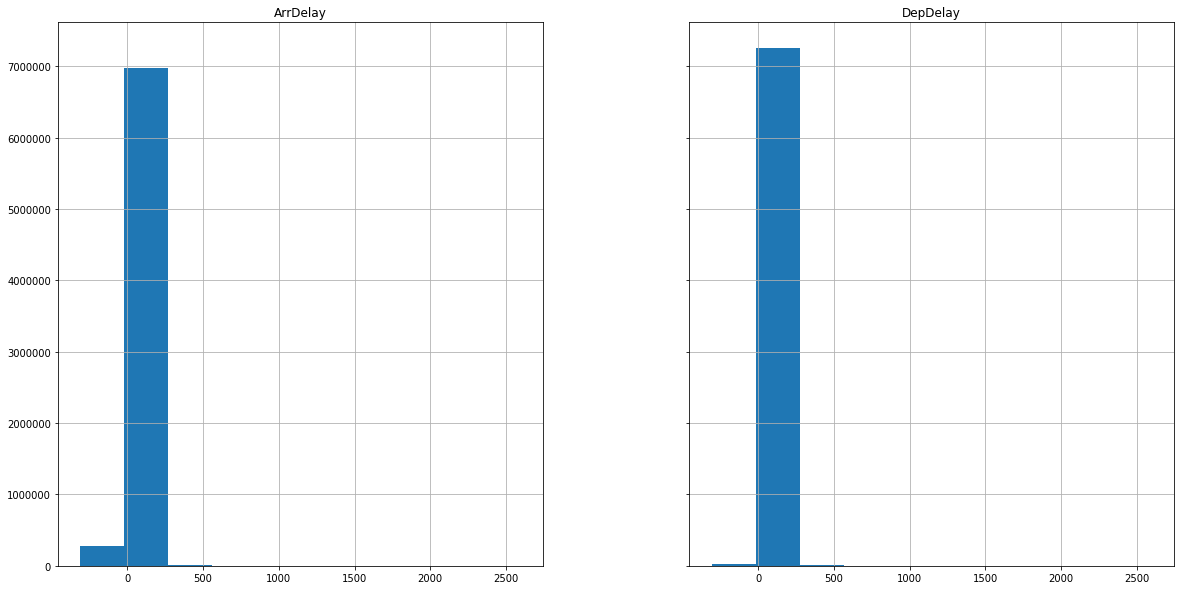

In [11]:
delays[['DepDelay','ArrDelay']].hist(figsize=(20,10),sharey=True, sharex=True);

Observations:

* Vast majority of delays fall below 250 min (4 hours).
* A smaller number of flights have delays that extend upto and exceed 500 min (8 hours)
* Comparing early departures with early arrivals (delay < 0), it seems that early arrival is more common than early departure.

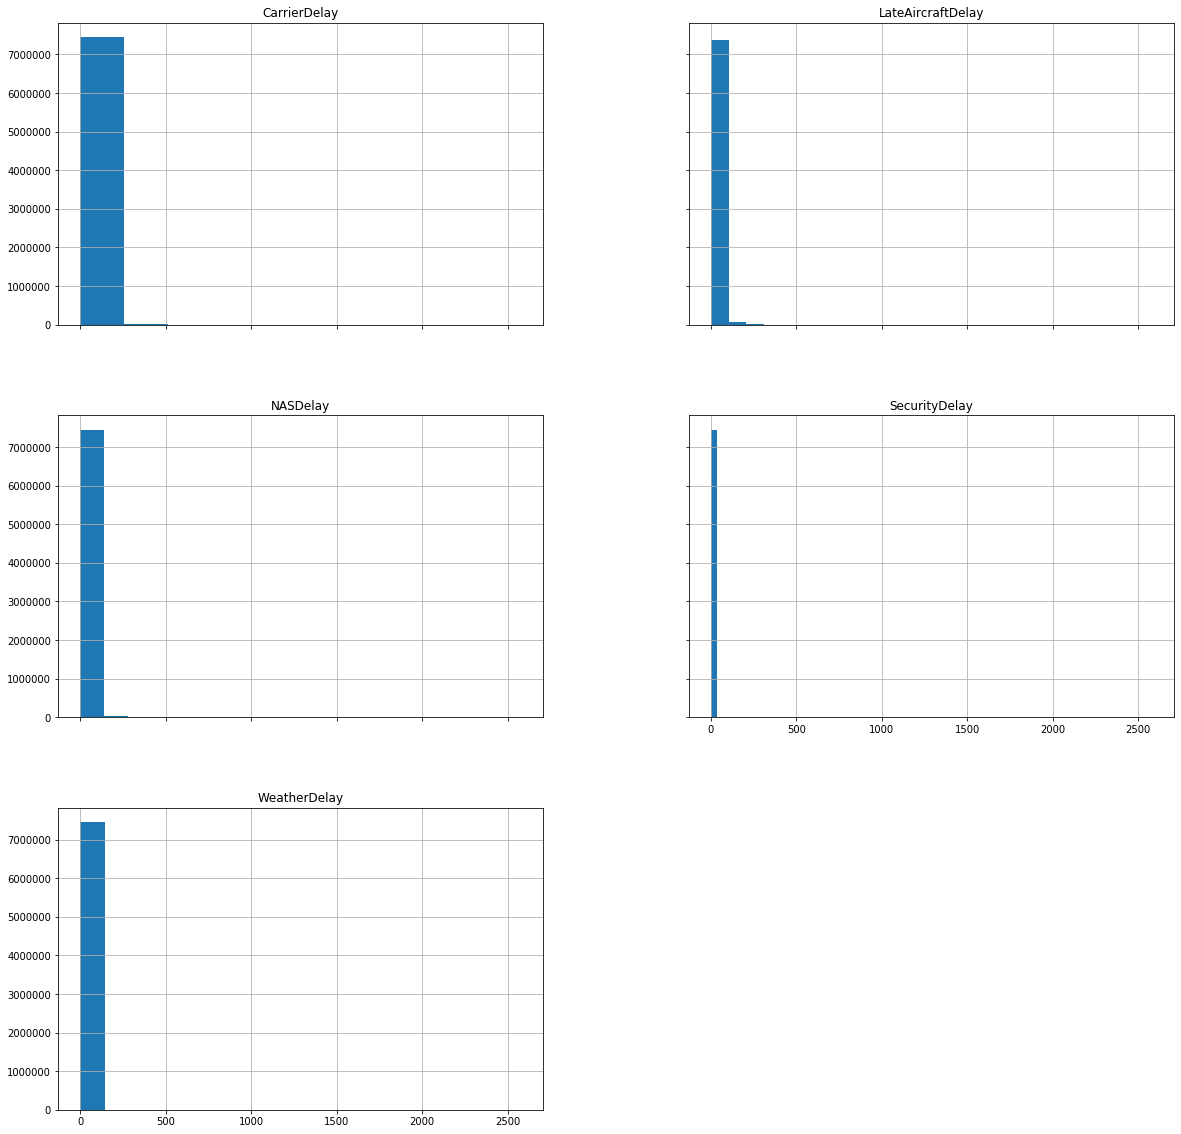

In [12]:
df07[['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].hist(figsize=(20,20),sharey=True, sharex=True);

Observations:

* It seems that Carrier (airline) delay is the main culprit behind extended delays.
* Delays due to security reasons seem to have minimal contribution in flight delays.
* Weather delays seem high in frequency, albeit low in terms of delay values compared to NAS delays or carrier delays. 

A    41.542405
B    38.529633
C    19.903701
D     0.024261
Name: CancellationCode, dtype: float64


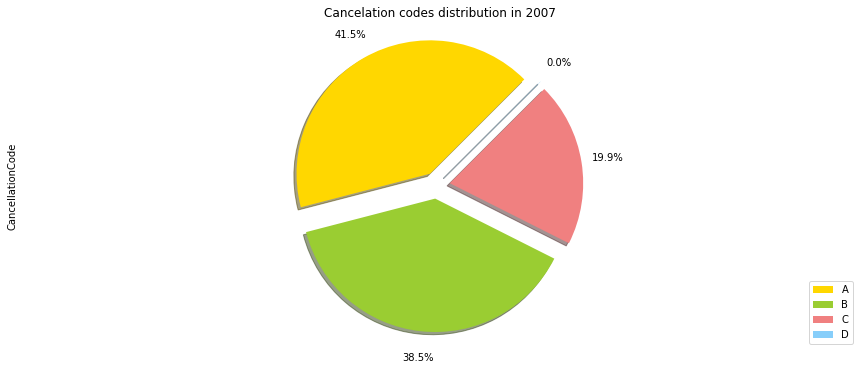

In [13]:
C_code=df07.CancellationCode.value_counts(normalize=True)
print(C_code*100)
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode_list = [0.1, 0.1, 0.1, 0.1]
C_code.plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=45,shadow=True, labels=None, pctdistance=1.2, explode=explode_list, colors=colors_list);

plt.title('Cancelation codes distribution in 2007') 
plt.axis('equal') 
plt.legend(labels=C_code.index, loc='lower right') 
plt.show()

Observations:

Cancelled flights fall under one of the following categories;
* A: carrier - 41.5%
* B: weather - 38.5%
* C: NAS (National Aviation System) - 19.9%
* D: security - 0.02% (almost none)

## Bivariate Exploration

> Let us see how are some of these delays correlate to one another.

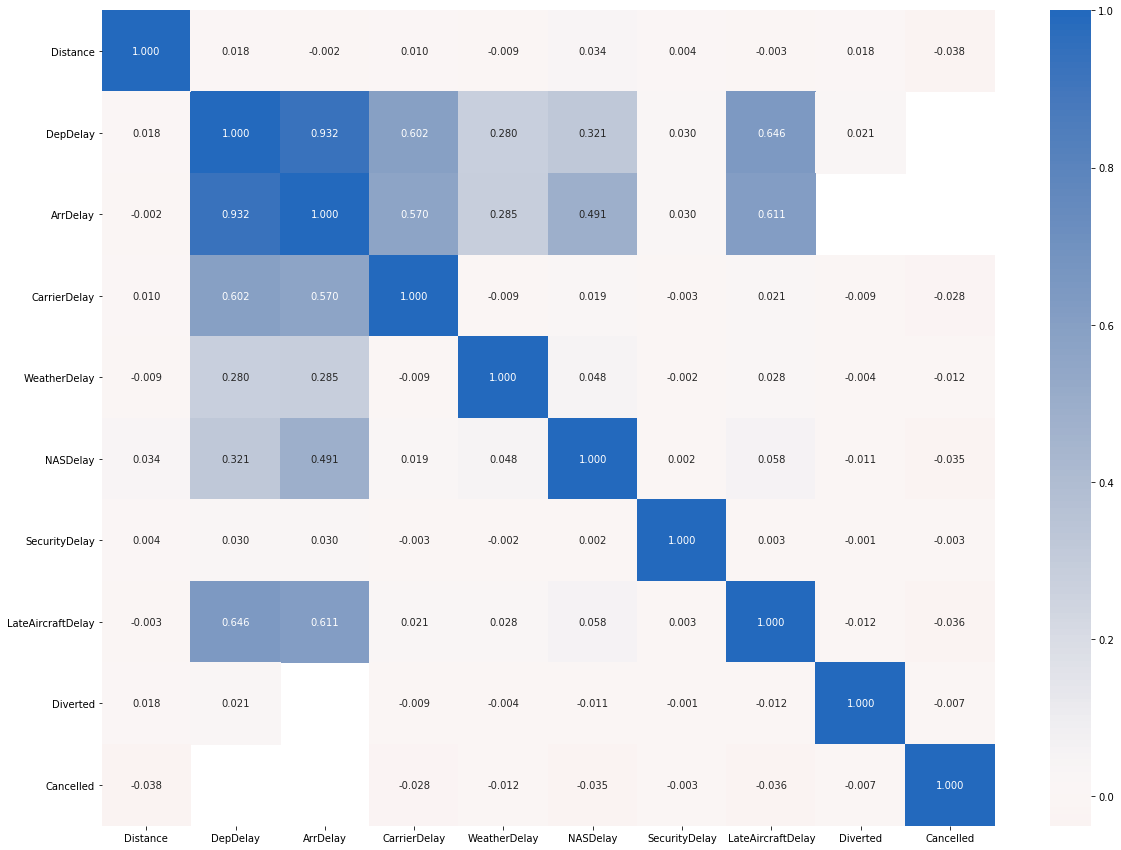

In [14]:
plt.subplots(figsize=(20,15))
sns.heatmap(delays.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);


From the above correlation matrix we can see that departure and arrival delays have the strongest correlation, which makes sense. We can also see a considerable correlation between Late Aircraft delay, NAS delay, Carrier delay one one side and departure/arrival delays on the other side.

First, let's see how departure and arrival delays are related;

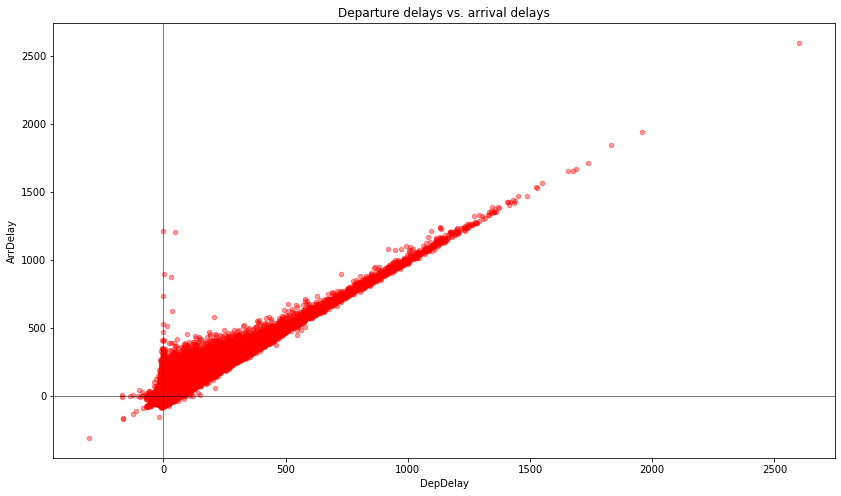

In [15]:
delays.plot(kind='scatter',x='DepDelay',y='ArrDelay',figsize=(14, 8),alpha=0.4,color='red')

plt.title('Departure delays vs. arrival delays')
plt.axhline(y=0,linewidth=0.5, color='k')
plt.axvline(x=0, linewidth=0.5,color='k')
plt.show()

### Observations from above scatter plot
1. Few flights have exceptionally large delay in arrival (such as 2500 minutes ~ 40 hours), this can only be justified if the delay in departure is also exceptionally large. Whcih is evident in the above plot.

2. The strong relation between delays in flight departure and delays is as evident as it is logical, however, it can be observed that the extent of delay in arrival against zero-delay in departure is much higher than the extent of delay in departure against zero-delay in arrival. In other words, there is a considerable number of flights that had a delayed arrival despite departing on time.

To address point number 1 above, here is the upper and lower limits of departure and arrival delays:

In [16]:
print('Max and min departure delay values',delays.DepDelay.max(),'',delays.DepDelay.min())
print('Max and min departure arrival values',delays.ArrDelay.max(),'',delays.ArrDelay.min())

Max and min departure delay values 2601.0  -305.0
Max and min departure arrival values 2598.0  -312.0


As for observation number 2 above, we can zoon in to this area of concern and take a closer look

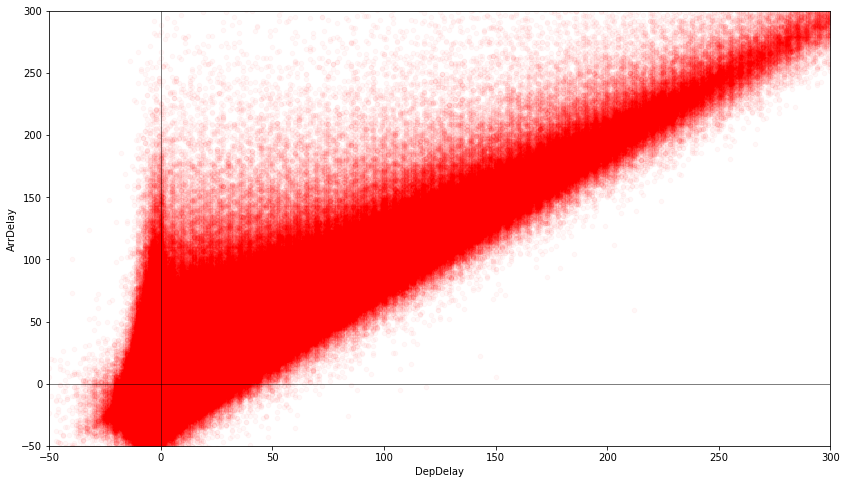

In [17]:
# limit the x and y values (departure and arrival delays) to (50 min early upto 300 min delay)
delays.plot(kind='scatter',x='DepDelay',y='ArrDelay',figsize=(14, 8),alpha=0.03, color='red',xlim=(-50,300), ylim=(-50,300))

plt.axhline(y=0,linewidth=0.5, color='k')
plt.axvline(x=0, linewidth=0.5,color='k')
plt.show()

The darker spike on the y-axis suggests that a considerable number of flights gets delayed at arrival despite departing on time. Let's see which flights fall under these conditions.

In [18]:
D_arr=delays[(delays.DepDelay==0) & (delays.ArrDelay>0)]
print('The number of flights that arrived late despite departing on time is',(f"{D_arr.shape[0]:,d}"), 'which represents',round(D_arr.shape[0]/df07.shape[0]*100,2),'%','of all flights')
D_arr.sample(10)

The number of flights that arrived late despite departing on time is 226,301 which represents 3.04 % of all flights


,UniqueCarrier,Origin,Dest,Distance,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Diverted,Cancelled,CancellationCode
2638179,OO,DEN,CLE,1201,0.0,3.0,0,0,0,0,0,0,0,NaN
1530615,EV,MKE,CVG,318,0.0,4.0,0,0,0,0,0,0,0,NaN
5768984,OH,STL,CVG,307,0.0,1.0,0,0,0,0,0,0,0,NaN
3549964,9E,DTW,GSP,508,0.0,1.0,0,0,0,0,0,0,0,NaN
3911855,OO,DEN,ASE,125,0.0,1.0,0,0,0,0,0,0,0,NaN
6520141,US,BWI,PHX,1999,0.0,9.0,0,0,0,0,0,0,0,NaN
1994032,OH,DCA,BOS,399,0.0,5.0,0,0,0,0,0,0,0,NaN
2737067,US,PHX,PHL,2075,0.0,1.0,0,0,0,0,0,0,0,NaN
6622742,MQ,ABI,DFW,158,0.0,6.0,0,0,0,0,0,0,0,NaN
6456250,UA,SFO,ORD,1846,0.0,11.0,0,0,0,0,0,0,0,NaN


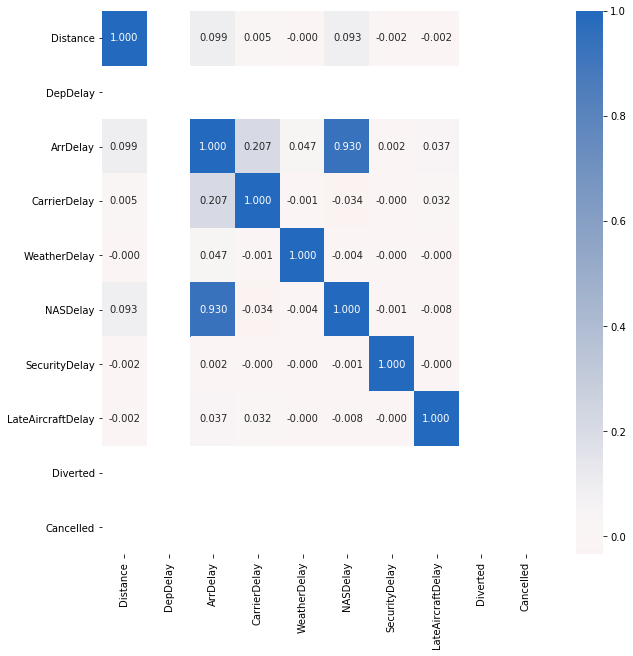

In [19]:
plt.subplots(figsize=(10,10))
sns.heatmap(D_arr.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);

Observations

>It is evident from the above heat map that the main attribute behind arrival delays for flights that actually departed on time is "NAS Delay" with a correlation factor of 0.93.

What is NAS delay?

>National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

## Multivariate Exploration

Next, we take a look at how airlines stack up against each others in terms of delay

In [20]:
Airline_delay=df07.groupby('UniqueCarrier')['DepDelay','ArrDelay','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'].mean().round(decimals=2).sort_values(by='DepDelay')

print(Airline_delay.shape)
Airline_delay

C:\Users\ifadl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(20, 7)


,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
UniqueCarrier,,,,,,,
HA,-0.88,-0.43,2.40,0.03,0.02,0.01,0.84
AQ,0.44,-1.38,1.68,0.02,0.13,0.02,1.16
F9,7.41,7.43,2.86,0.40,4.15,0.02,2.19
DL,7.85,7.30,3.22,0.32,3.92,0.01,3.41
OO,8.31,8.84,4.57,0.60,2.00,0.03,4.36
NW,8.93,12.56,5.49,0.76,4.61,0.02,3.22
FL,9.04,7.94,1.91,0.14,3.60,0.00,6.23
9E,9.11,8.14,4.36,0.78,2.93,0.01,3.97
WN,10.44,5.47,1.80,0.40,1.37,0.03,5.36


### Let's dive in a bit deeper

In [21]:
# looking at departure delays, arrival delays, carrier delays and late aircraft delay,
# assuming they are the attributes that can airlines have some control of
carrier_delays=df07.groupby('UniqueCarrier')['DepDelay','ArrDelay','CarrierDelay','LateAircraftDelay'].mean().round(decimals=2).sort_values(by='DepDelay')

carrier_delays

,DepDelay,ArrDelay,CarrierDelay,LateAircraftDelay
UniqueCarrier,,,,
HA,-0.88,-0.43,2.40,0.84
AQ,0.44,-1.38,1.68,1.16
F9,7.41,7.43,2.86,2.19
DL,7.85,7.30,3.22,3.41
OO,8.31,8.84,4.57,4.36
NW,8.93,12.56,5.49,3.22
FL,9.04,7.94,1.91,6.23
9E,9.11,8.14,4.36,3.97
WN,10.44,5.47,1.80,5.36


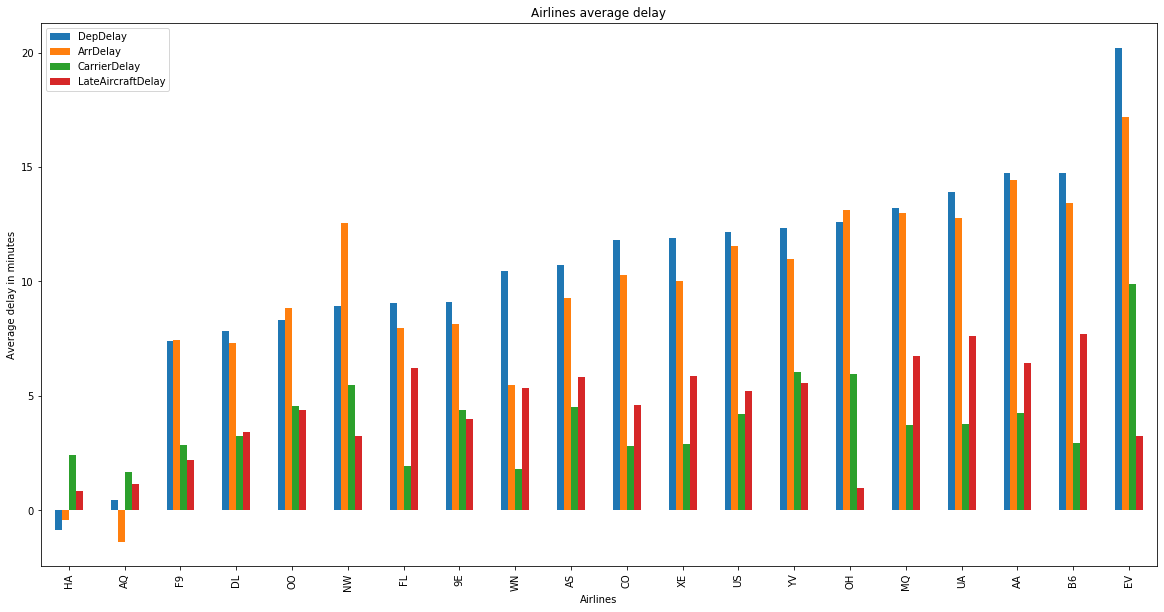

In [22]:
carrier_delays.plot(kind='bar', figsize=(20, 10))
 
plt.xlabel('Airlines')
plt.ylabel('Average delay in minutes')
plt.title('Airlines average delay')
plt.show()

Observations
* It seems that HA and AQ (Hawaiian Airlines and Aloha Airlines) are doing better than other airlines in terms of managing delays.
* Aloha Airlines is doing better than others when it comes to making up delays with early arrivals.
* Hawaiian Airlines has an evident record of early departures, making them the only airline in the dataset with a negative average of departure delays.
* Atlantic Southeast Airlines are doing the worst in almost every aspect of delays.

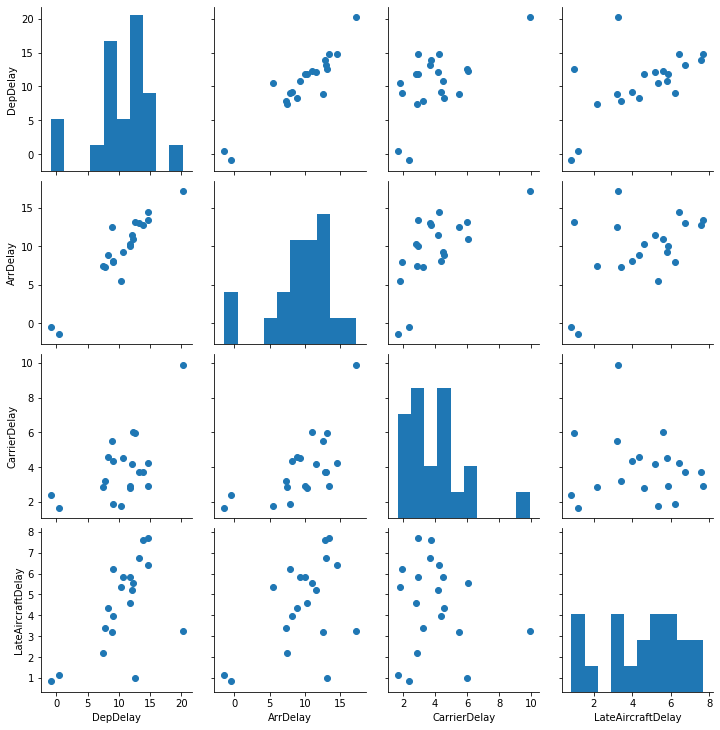

In [26]:
g = sns.PairGrid(data = carrier_delays)
g = g.map_diag(plt.hist);
g.map_offdiag(plt.scatter)

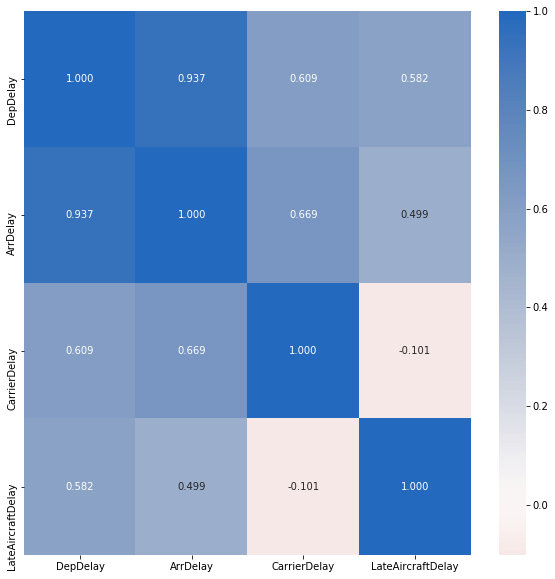

In [27]:
plt.subplots(figsize=(10,10))
sns.heatmap(carrier_delays.corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);

The pair grid and the correlation heat map above plots means of multiple variables against each other, the following correlations can be observed;
* Delays in arrival is strongly correlated with delays in departures, which makes sense.
* Departure delays and arrival delays are both considerablly correlated with Carrier delays
* Late aircraft delays has more impact on departure delays and less impact on arrival delays.

## Observations highlights

* Short haul flight are more frequent than long haul flights.
* Early arrivals are more common than early departures.
* Carrier delays are the highest among delays and carrier cancellations are the most frequent among cancellations.
* NAS delays are the main reason behind arrival delays for flights that departed on time.
* Best on-time performace goes to Hawaiian Airlines and Aloha Airlines.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!